# STAT479: Machine Learning -- L05: Decision Trees in Scikit-Learn Demo

STAT 479: Machine Learning (Fall 2019)  
Instructor: Sebastian Raschka (sraschka@wisc.edu)  

Course website: http://stat.wisc.edu/~sraschka/teaching/stat479-fs2019/  

In [2]:
%load_ext watermark
%watermark  -d -u -a "Sebastian Raschka" -v -p numpy,scipy,matplotlib,sklearn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Sebastian Raschka 
last updated: 2020-01-24 

CPython 3.7.6
IPython 7.11.1

numpy 1.17.5
scipy 1.3.2
matplotlib 3.1.2
sklearn 0.22.1


In [3]:
from sklearn import datasets
import numpy as np


iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [4]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [5]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


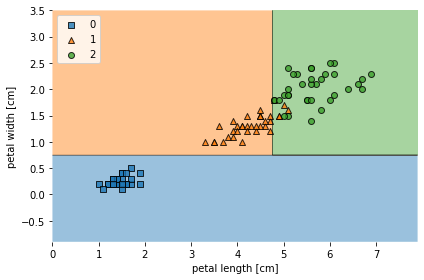

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions


tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=2, 
                              random_state=1)
tree.fit(X_train, y_train)


plot_decision_regions(X_train, y_train, tree)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('images/sklearn_tree.png', dpi=300)
plt.savefig('images/sklearn_tree.pdf')
plt.show()

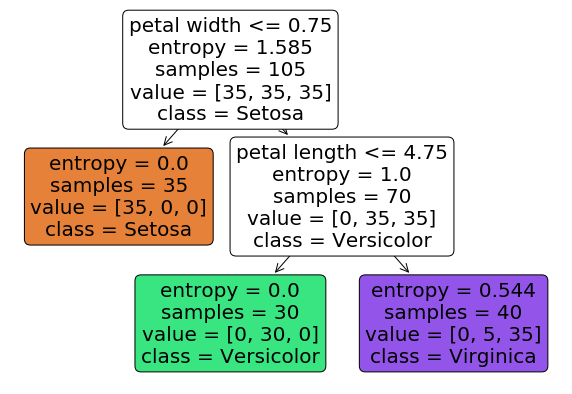

In [7]:
from sklearn.tree import plot_tree


plt.figure(figsize=(10, 7))

plot_tree(tree, 
          filled=True, 
          rounded=True,
          class_names=['Setosa', 
                       'Versicolor',
                       'Virginica'],
          feature_names=['petal length', 
                         'petal width']) 

plt.show()